In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers
from scipy.stats.mstats import winsorize

2024-08-02 12:54:27.992180: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 12:54:28.030868: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 12:54:28.577124: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_sete_barbas_art', 'Cam_branco_art', 'Cam_rosa_art', 'Cam_barba_ruca_art']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_barba_ruca_art']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_art']+df_Camaroes.loc[i,'Cam_branco_art']+df_Camaroes.loc[i,'Cam_rosa_art']+df_Camaroes.loc[i, 'Cam_barba_ruca_art']
  
dados = dados[['Ano','Cam_barba_ruca_art','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_barba_ruca_art'] = dados.loc[i,'Cam_barba_ruca_art'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_barba_ruca_art'].values
dados.head()



/tmp/ipykernel_58634/2531077707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_art']+df_Camaroes.loc[i,'Cam_branco_art']+df_Camaroes.loc[i,'Cam_rosa_art']+df_Camaroes.loc[i, 'Cam_barba_ruca_art']


,Ano,Cam_barba_ruca_art,Soma,Prop_Cam_barba_ruca_art
0,1981,285.0,1719.0,0.165794
1,1982,15.0,2170.0,0.006912
2,1983,2074.0,4077.0,0.508707
3,1984,2437.0,5993.0,0.406641
4,1985,2554.0,5281.0,0.483621


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [11]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=60, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_barba_ruca/pesos prop art 1950-1988/.weights.h5', overwrite=True)

Epoch 1/60


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9992
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9664
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9409
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9117
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8805
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8462
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8099
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7726
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7385
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7114
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6942
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6875
Epoch 13/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6867
Epoch 14/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6869
Epoch 15/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6866
Epoch 16/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/st

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_barba_ruca/pesos prop art 1950-1988/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.21713693]
 [0.21985482]
 [0.22267197]
 [0.22555293]
 [0.22844133]
 [0.23132075]
 [0.23417637]
 [0.2370009 ]
 [0.2398107 ]
 [0.24262056]
 [0.24543041]
 [0.24826527]
 [0.25117153]
 [0.25411865]
 [0.25712588]
 [0.2601376 ]
 [0.26308644]
 [0.2660141 ]
 [0.26896897]
 [0.27207944]
 [0.27521223]
 [0.2783252 ]
 [0.28144106]
 [0.2848279 ]
 [0.28842893]
 [0.29204863]
 [0.29589427]
 [0.29984984]
 [0.30470735]
 [0.30980888]
 [0.31528366]
 [0.32078746]
 [0.3268508 ]
 [0.3371361 ]
 [0.3509853 ]
 [0.3648801 ]
 [0.37864017]
 [0.39212024]
 [0.4056746 ]]


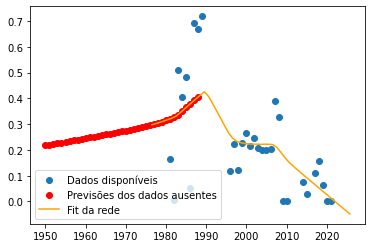

In [12]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

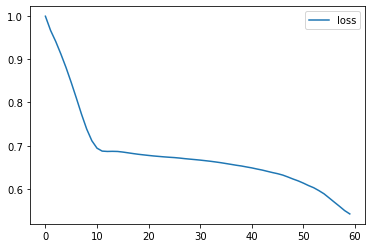

In [13]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [14]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_continua_Cam_barba_ruca_art 1950-1988',prev_continua)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
